In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pk

In [2]:
full_data = pd.read_csv('USA_Housing.csv')

In [3]:
print('full data',full_data.shape)

full data (5000, 7)


In [4]:
full_data.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4552,63237.109949,4.666786,9.086573,5.17,33805.578560,1.133140e+06,"48850 Lauren Cape Apt. 922\nLake Stacy, AL 39607"
3498,62135.394775,7.314557,6.468901,2.26,37575.235894,1.432013e+06,"3854 Raymond Crossroad\nRiveraberg, AL 41086-3560"
2477,66465.365909,5.623939,7.079810,6.21,41130.090912,1.258564e+06,"4440 Dennis Green Apt. 666\nBarryport, CT 3631..."
327,61252.637672,5.189911,7.191573,4.43,40890.266029,1.026272e+06,"3505 Smith Spring\nLake Ashleyville, WY 32703-..."
2543,69916.809395,6.256890,5.859986,2.33,41686.412853,1.302348e+06,"1075 Brian Ways Apt. 639\nLake Kristenburgh, C..."


In [5]:
full_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
full_data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
#remove address column
full_data.drop('Address',axis =1,inplace = True)

In [9]:
full_data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [10]:
full_data.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06


In [11]:
# numreic sumary
full_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [12]:
full_data.shape

(5000, 6)

## Target variable splitting
#### we will split full dataset into input and target variales

- input is also called feature variable
- output is also called target variable

In [13]:
#split the data to be used in models

#create matrix of features(input)
x=full_data.drop('Price',axis = 1)# graps everything else but price

#create target variable
y=full_data['Price'] # y is the column we are tring to predict

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Save the scaler object
pk.dump(scaler, open('scaler.pkl', 'wb'))

In [16]:
y.shape

(5000,)

# Model Training
### Linear Regression

In [17]:
# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)

LinearRegression()

# Model Testing

In [18]:
# Make predictions on the test set
y_pred = lin_reg.predict(x_test_scaled)

In [19]:
# Print predictions
print(y_pred.shape)
print(y_pred)

(1000,)
[1308587.92699753 1237037.22949428 1243429.34030687 1228900.21360379
 1063320.9071082  1544058.05034856 1094774.70493022  833284.72339228
  788412.85578724 1469714.86615707  671728.43662066 1606818.21977935
 1004166.61331062 1796798.97595927 1288566.96221017 1087782.93301077
 1423072.37492526 1078178.68169673  802286.03537901  930761.03695714
 1134829.86477819  916398.42023136 1489972.69335422 1284580.15538819
 1582071.35322731 1132519.15991993 1089888.39644513  974510.51872158
  924057.96820669 1740759.72092272 1286481.5951232  1621289.9517161
 1435264.20161716 1234014.77924484 1485434.57300368 1718335.00753687
 1538953.74882846  777106.64791795 1765201.52243617 1175972.1419982
 1553707.94323484  897703.67505177 1371049.80326608  845281.72310359
 1201022.89803883 1133285.98450856 1363128.14557352 1449814.08768269
 1574363.90467353 1233577.50265971 1484464.01606206 1295276.5894355
 1222136.77335287  990124.41659783 1693824.96035767 1823785.05665098
 1136495.63903356 1282164.403

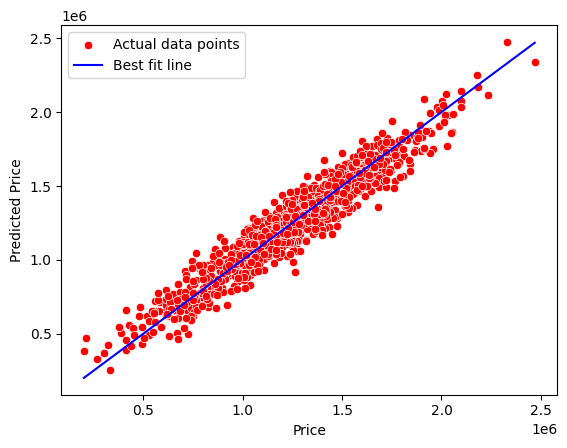

In [20]:
# Plot the results
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Actual data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', label='Best fit line')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

## Model Evulation
- Linear Regression

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test,y_pred)

#print evaluation metric
print('Mean absolute Error :',mae)
print('Mean Squared Error :',mse)
print('Root Mean Squared Error :',rmse)
print('R2 Score :',r2score)

Mean absolute Error : 80879.09723489445
Mean Squared Error : 10089009300.89399
Root Mean Squared Error : 100444.06055558482
R2 Score : 0.9179971706834331


In [25]:
x.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174


In [26]:
# Predicting for new input data
input_data_model = pd.DataFrame(
    [[79876.52345, 5.322112, 6.826241, 3.8, 56098.172671]],
    columns=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
)

In [27]:
# Scale the new input data
input_data_model_scaled = scaler.transform(input_data_model)

In [28]:
# Make a prediction on the scaled input
prediction = lin_reg.predict(input_data_model_scaled)
print(prediction)

[1653295.92487596]


In [29]:
import pickle as pk

In [30]:
pk.dump(lin_reg,open('model.pkl','wb'))